In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("adult-modified-09-13-2025.csv")


In [4]:
print(df.head())


  age      workclass  education  education-num marital-status  \
0  39         Public  Bachelors             13  Never-married   
1  50  Self-employed  Bachelors             13        Married   
2  38        Private    HS-grad              9       Divorced   
3  53        Private       11th              7        Married   
4  28        Private  Bachelors             13        Married   

          occupation   relationship   race     sex  hours-per-week  \
0       Adm-clerical  Not-in-family  White    Male              40   
1    Exec-managerial        Husband  White    Male              13   
2  Handlers-cleaners  Not-in-family  White    Male              40   
3  Handlers-cleaners        Husband  Black    Male              40   
4     Prof-specialty           Wife  Black  Female              40   

  native-country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4           Cuba  <=50K  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.0+ MB


In [6]:
print(df.describe())   # gives mean, std, min, max, quartiles


       education-num  hours-per-week
count   32561.000000    32561.000000
mean       10.080679       40.437456
std         2.572720       12.347429
min         1.000000        1.000000
25%         9.000000       40.000000
50%        10.000000       40.000000
75%        12.000000       45.000000
max        16.000000       99.000000


In [7]:
for col in df.select_dtypes(include=["object"]).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for age:
age
36    897
31    887
34    884
23    875
35    874
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 74, dtype: int64

Value counts for workclass:
workclass
Private          22696
Public            4351
Self-employed     3657
?                 1836
Without-pay         14
Never-worked         7
Name: count, dtype: int64

Value counts for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Value counts for marital-status:
marital-status
Married                  14999
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
M

In [8]:
print(df.isnull().sum())


age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [9]:
df = pd.read_csv(
    "adult-modified-09-13-2025.csv",
    na_values=["?", "NA", "N/A", "", " ?"]
)


In [10]:
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].str.strip()

In [11]:
print("Shape on load:", df.shape)

Shape on load: (32561, 12)


In [12]:
missing_before = df.isna().sum().sort_values(ascending=False)
print("\nMissing values per column (before):\n", missing_before)



Missing values per column (before):
 occupation        1843
workclass         1836
native-country     583
age                 45
education            0
education-num        0
marital-status       0
relationship         0
race                 0
sex                  0
hours-per-week       0
income               0
dtype: int64


In [13]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

In [14]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean(numeric_only=True))

In [15]:
df = df.dropna(subset=cat_cols)
print("\nShape after numeric impute + dropping cat-NaNs:", df.shape)



Shape after numeric impute + dropping cat-NaNs: (30162, 12)


In [16]:
df = df.drop(columns=["education", "native-country"], errors="ignore")
print("Shape after dropping specified columns:", df.shape)

Shape after dropping specified columns: (30162, 10)


In [17]:
missing_after = df.isna().sum().sort_values(ascending=False)
print("\nMissing values per column (after):\n", missing_after)
print("\nTotal missing cells after cleaning:", int(missing_after.sum()))



Missing values per column (after):
 age               0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

Total missing cells after cleaning: 0


In [18]:
final_num_cols = df.select_dtypes(include=["number"]).columns
stats = df[final_num_cols].agg(["mean", "std"]).T  # nicer layout
print("\nNew means and standard deviations (numeric columns):\n", stats)



New means and standard deviations (numeric columns):
                      mean        std
age             38.438107  13.128006
education-num   10.121312   2.549995
hours-per-week  40.931238  11.979984


In [19]:
df.to_csv("adult_clean_no_missing.csv", index=False)
print("\nSaved cleaned dataset to: adult_clean_no_missing.csv")


Saved cleaned dataset to: adult_clean_no_missing.csv


In [20]:
import matplotlib.pyplot as plt


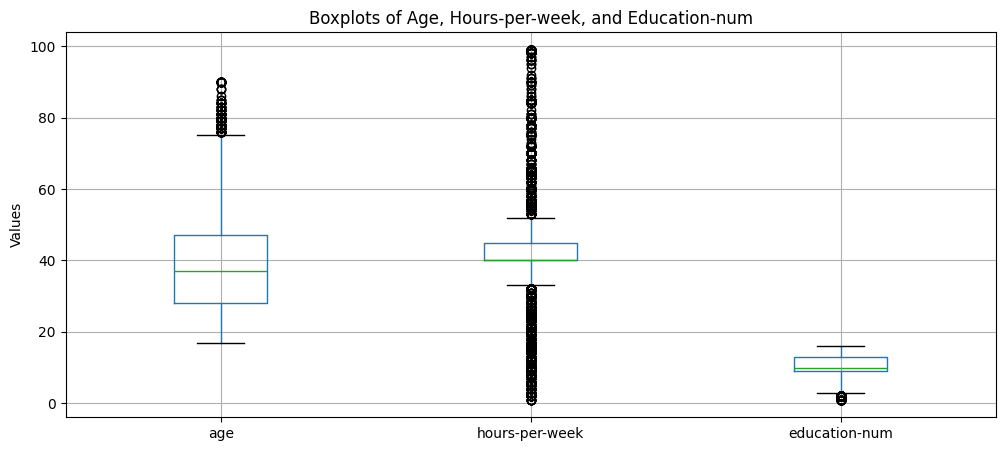

In [21]:
numeric_cols = ["age", "hours-per-week", "education-num"]

plt.figure(figsize=(12, 5))
df[numeric_cols].boxplot()
plt.title("Boxplots of Age, Hours-per-week, and Education-num")
plt.ylabel("Values")
plt.show()


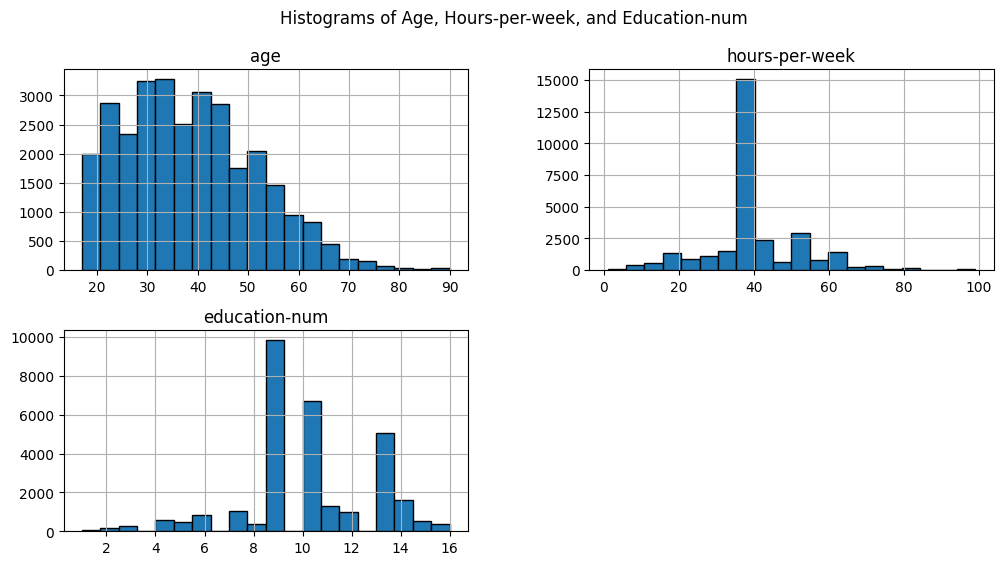

In [22]:
df[numeric_cols].hist(bins=20, figsize=(12, 6), edgecolor="black")
plt.suptitle("Histograms of Age, Hours-per-week, and Education-num")
plt.show()


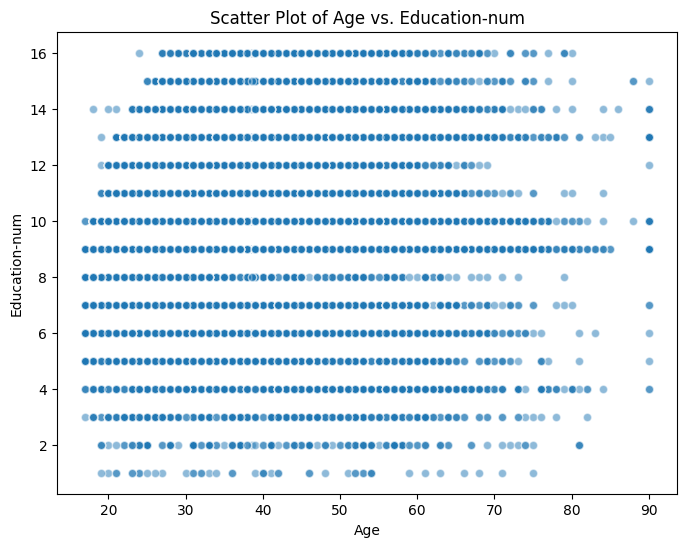

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df["age"], df["education-num"], alpha=0.5, edgecolors="w")
plt.title("Scatter Plot of Age vs. Education-num")
plt.xlabel("Age")
plt.ylabel("Education-num")
plt.show()


In [24]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'income']


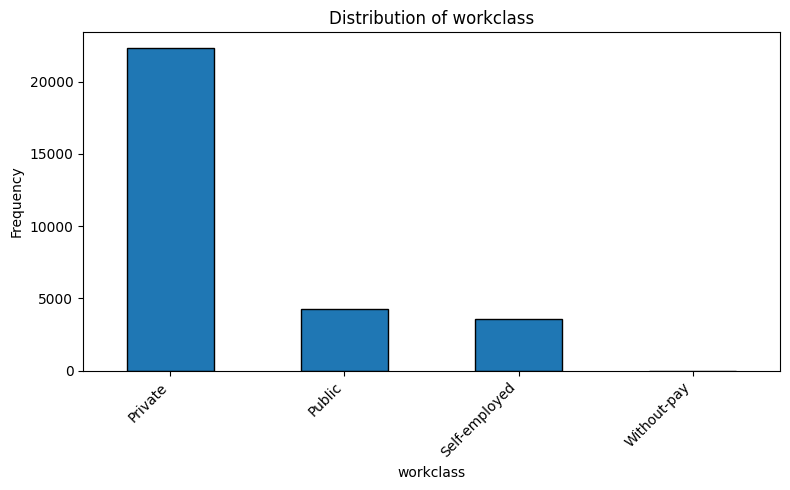

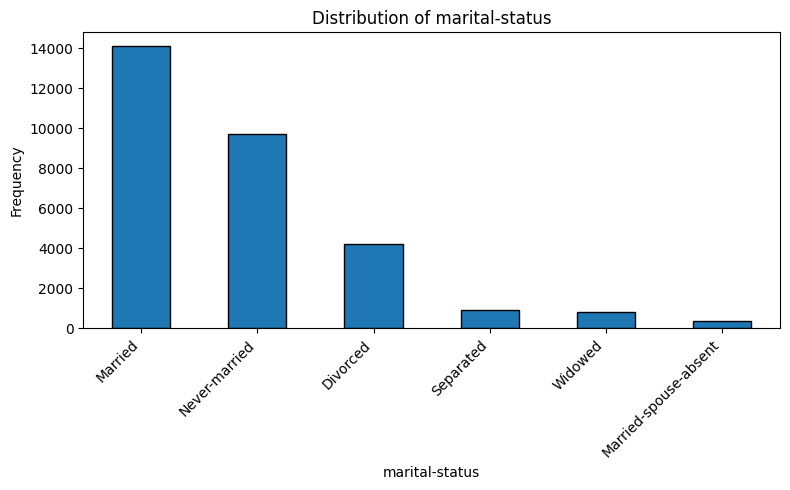

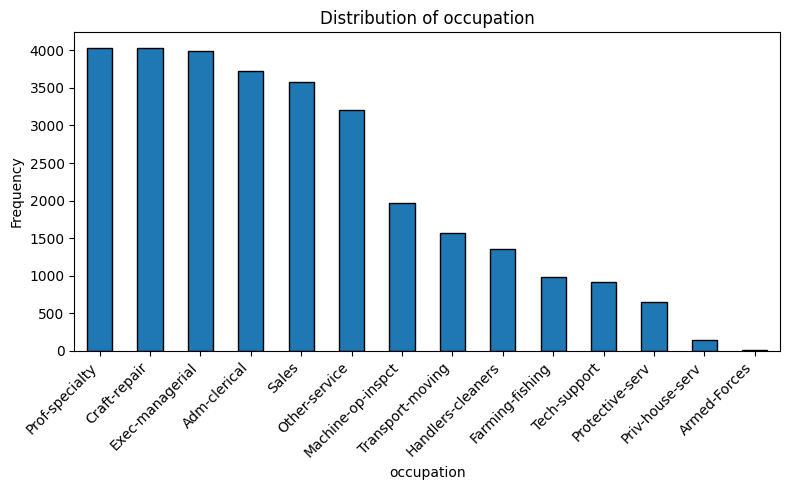

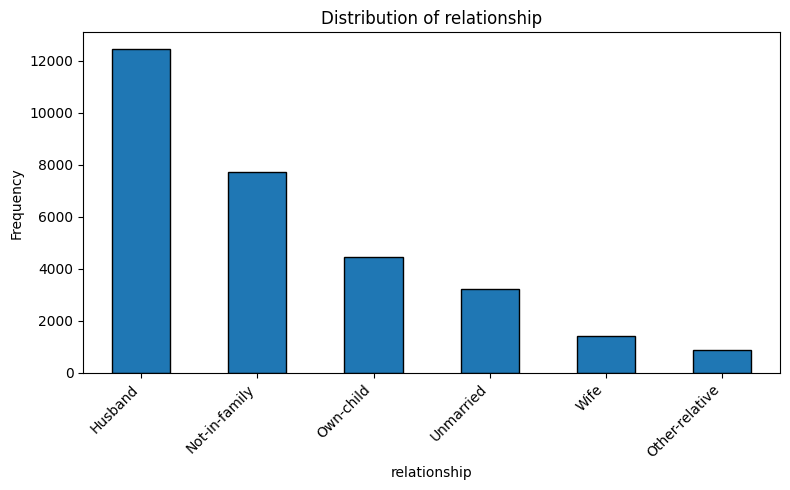

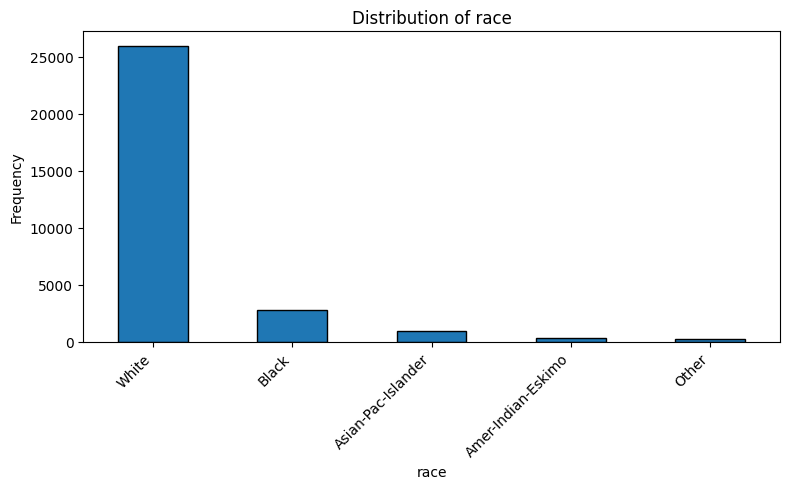

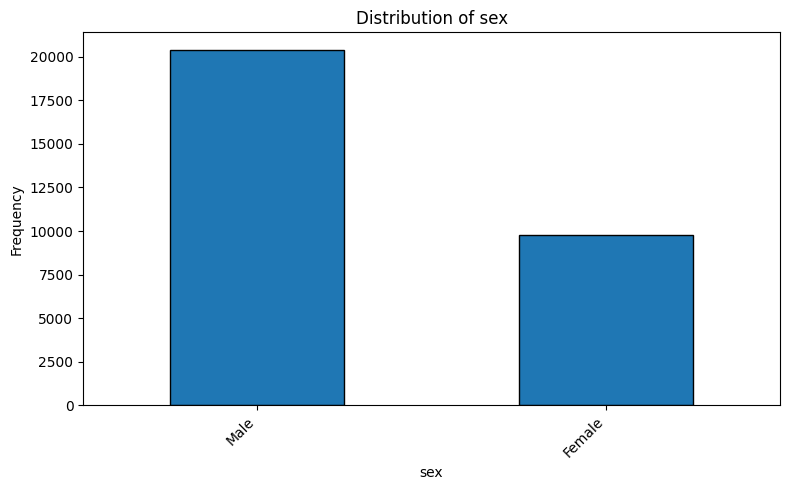

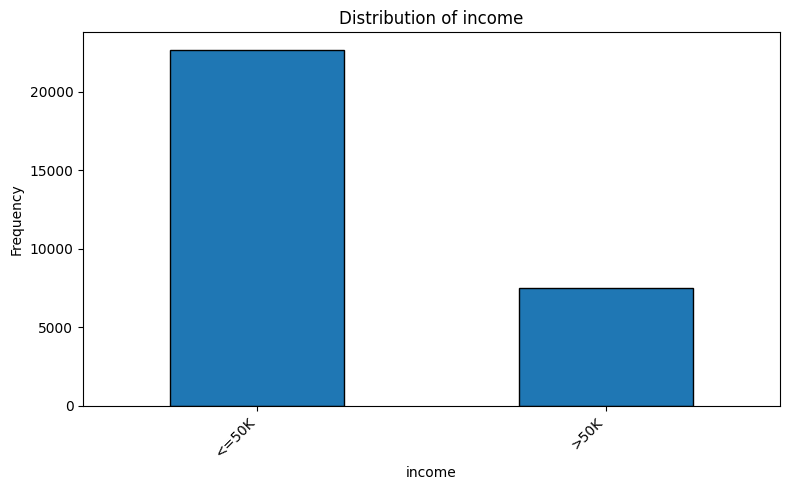

In [25]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind="bar", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [26]:
workclass_income_ct = pd.crosstab(df["workclass"], df["income"])
print("Cross-tab: Workclass vs. Income\n")
print(workclass_income_ct)

Cross-tab: Workclass vs. Income

income         <=50K  >50K
workclass                 
Private        17410  4876
Public          2971  1318
Self-employed   2259  1314
Without-pay       14     0


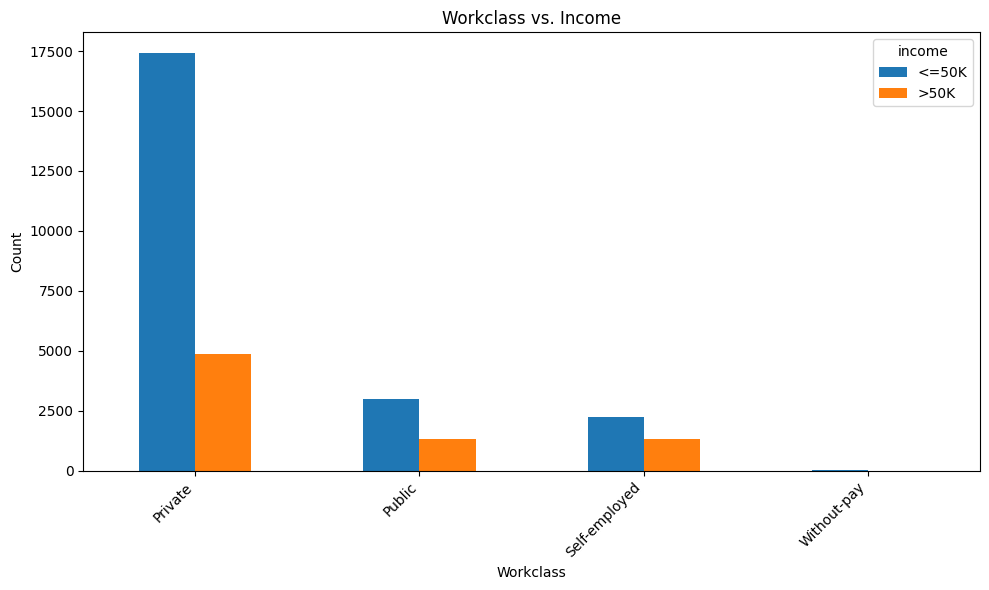

In [27]:
workclass_income_ct.plot(kind="bar", figsize=(10,6))
plt.title("Workclass vs. Income")
plt.ylabel("Count")
plt.xlabel("Workclass")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [28]:
race_income_ct = pd.crosstab(df["race"], df["income"])
print("\nCross-tab: Race vs. Income\n")
print(race_income_ct)


Cross-tab: Race vs. Income

income              <=50K  >50K
race                           
Amer-Indian-Eskimo    252    34
Asian-Pac-Islander    647   248
Black                2451   366
Other                 210    21
White               19094  6839


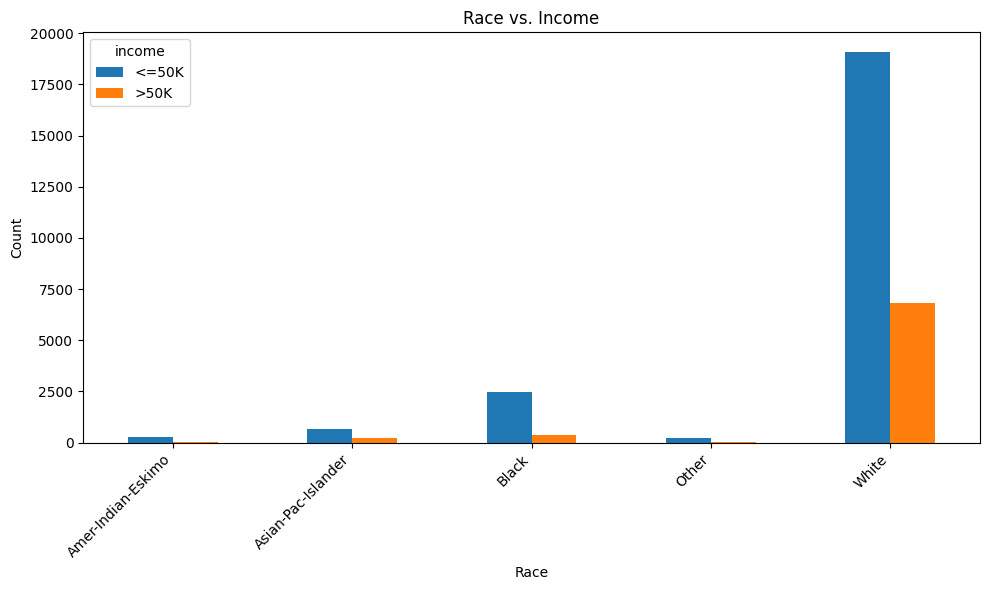

In [29]:
race_income_ct.plot(kind="bar", figsize=(10,6))
plt.title("Race vs. Income")
plt.ylabel("Count")
plt.xlabel("Race")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [30]:
race_income_pct = pd.crosstab(df["race"], df["income"], normalize="index") * 100
print("\nPercentage distribution of income within each race:\n")
print(race_income_pct.round(2))



Percentage distribution of income within each race:

income              <=50K   >50K
race                            
Amer-Indian-Eskimo  88.11  11.89
Asian-Pac-Islander  72.29  27.71
Black               87.01  12.99
Other               90.91   9.09
White               73.63  26.37


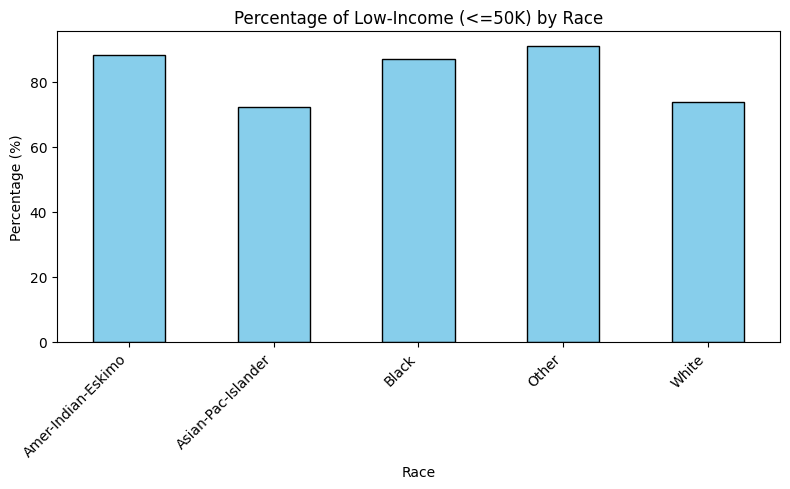

In [33]:
race_income_pct["<=50K"].plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")
plt.title("Percentage of Low-Income (<=50K) by Race")
plt.ylabel("Percentage (%)")
plt.xlabel("Race")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [34]:
subset = df[(df["workclass"] == "Private") & (df["education-num"] < 13)]
print("Subset shape:", subset.shape)
subset.head()

Subset shape: (17549, 10)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,7,Married,Handlers-cleaners,Husband,Black,Male,40,<=50K
6,49.0,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,<=50K
10,37.0,Private,10,Married,Exec-managerial,Husband,Black,Male,80,>50K
13,32.0,Private,12,Never-married,Sales,Not-in-family,Black,Male,50,<=50K


In [35]:
print("\nSummary statistics (numeric):\n")
print(subset.describe())


Summary statistics (numeric):

                age  education-num  hours-per-week
count  17549.000000   17549.000000    17549.000000
mean      36.264762       8.919768       39.366403
std       13.125882       1.851124       11.135493
min       17.000000       1.000000        1.000000
25%       25.000000       9.000000       39.000000
50%       34.000000       9.000000       40.000000
75%       45.000000      10.000000       40.000000
max       90.000000      12.000000       99.000000


In [36]:
cat_cols = subset.select_dtypes(include=["object", "category"]).columns.tolist()
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", subset[col].value_counts(normalize=True).round(3)*100)



Value counts for workclass:
 workclass
Private    100.0
Name: proportion, dtype: float64

Value counts for marital-status:
 marital-status
Married                  40.3
Never-married            36.5
Divorced                 15.1
Separated                 3.8
Widowed                   2.9
Married-spouse-absent     1.3
Name: proportion, dtype: float64

Value counts for occupation:
 occupation
Craft-repair         17.0
Other-service        14.2
Adm-clerical         13.6
Sales                12.5
Machine-op-inspct    10.4
Exec-managerial       7.5
Handlers-cleaners     6.9
Transport-moving      6.8
Prof-specialty        4.2
Tech-support          2.9
Farming-fishing       2.4
Protective-serv       0.9
Priv-house-serv       0.8
Name: proportion, dtype: float64

Value counts for relationship:
 relationship
Husband           35.3
Not-in-family     25.1
Own-child         19.3
Unmarried         12.3
Wife               4.2
Other-relative     3.9
Name: proportion, dtype: float64

Value counts for

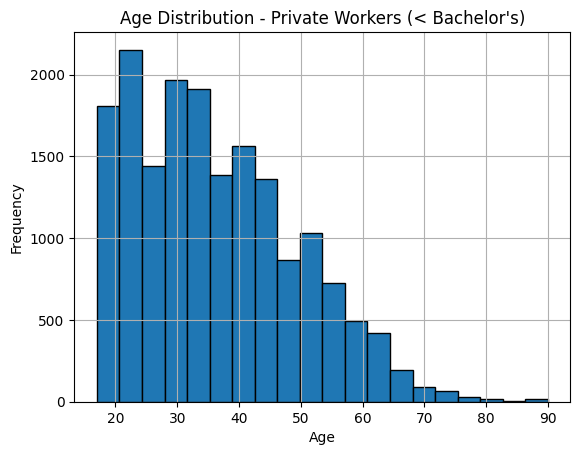

In [37]:
subset["age"].hist(bins=20, edgecolor="black")
plt.title("Age Distribution - Private Workers (< Bachelor's)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

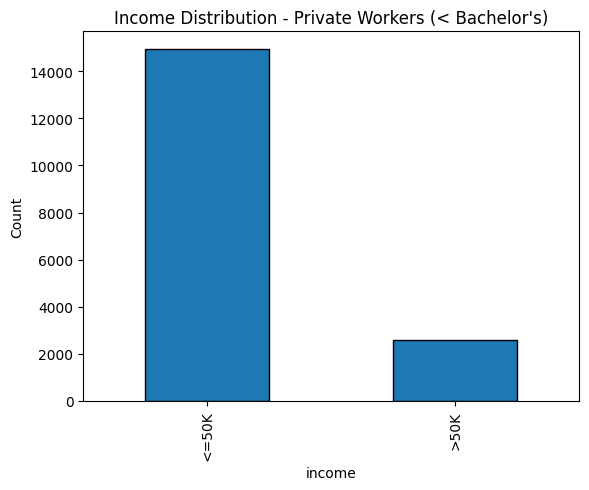

In [38]:
subset["income"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Income Distribution - Private Workers (< Bachelor's)")
plt.ylabel("Count")
plt.show()

In [39]:
low_income = df[df["income"] == "<=50K"]
high_income = df[df["income"] == ">50K"]

In [40]:
print("Low-income shape:", low_income.shape)
print("High-income shape:", high_income.shape)

Low-income shape: (22654, 10)
High-income shape: (7508, 10)


In [41]:
print("\nLow-income group (numeric stats):\n", low_income.describe())
print("\nHigh-income group (numeric stats):\n", high_income.describe())


Low-income group (numeric stats):
                 age  education-num  hours-per-week
count  22654.000000   22654.000000    22654.000000
mean      36.610004       9.629116       39.348592
std       13.458760       2.413596       11.950774
min       17.000000       1.000000        1.000000
25%       26.000000       9.000000       38.000000
50%       34.000000       9.000000       40.000000
75%       45.000000      10.000000       40.000000
max       90.000000      16.000000       99.000000

High-income group (numeric stats):
                age  education-num  hours-per-week
count  7508.000000    7508.000000     7508.000000
mean     43.954068      11.606420       45.706580
std      10.262403       2.368423       10.736987
min      19.000000       2.000000        1.000000
25%      36.000000      10.000000       40.000000
50%      43.000000      12.000000       40.000000
75%      51.000000      13.000000       50.000000
max      90.000000      16.000000       99.000000


In [42]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols.remove("income")

In [43]:
for col in cat_cols:
    print(f"\n{col} distribution by income:\n")
    print(pd.crosstab(df[col], df["income"], normalize="columns") * 100)


workclass distribution by income:

income             <=50K       >50K
workclass                          
Private        76.851770  64.944060
Public         13.114682  17.554608
Self-employed   9.971749  17.501332
Without-pay     0.061799   0.000000

marital-status distribution by income:

income                     <=50K       >50K
marital-status                             
Divorced               16.606339   6.020245
Married                33.888055  85.362280
Married-spouse-absent   1.496424   0.412893
Never-married          40.858127   6.259989
Separated               3.853624   0.879062
Widowed                 3.297431   1.065530

occupation distribution by income:

income                 <=50K       >50K
occupation                             
Adm-clerical       14.227068   6.632925
Armed-Forces        0.035314   0.013319
Craft-repair       13.781231  12.093767
Exec-managerial     9.071246  25.799148
Farming-fishing     3.858038   1.531700
Handlers-cleaners   5.592831   1.10548

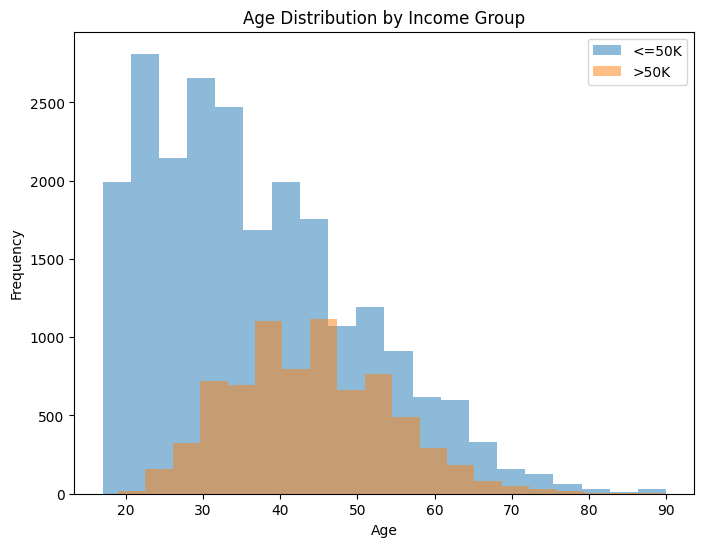

In [44]:
# Age distribution
plt.figure(figsize=(8,6))
df[df["income"]=="<=50K"]["age"].plot(kind="hist", bins=20, alpha=0.5, label="<=50K")
df[df["income"]==">50K"]["age"].plot(kind="hist", bins=20, alpha=0.5, label=">50K")
plt.title("Age Distribution by Income Group")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

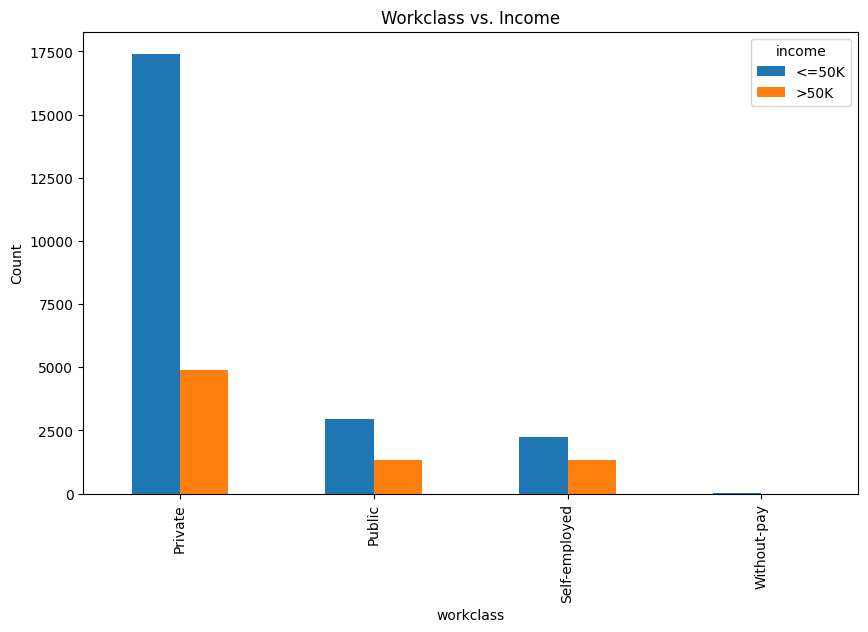

In [45]:
# Workclass vs income
pd.crosstab(df["workclass"], df["income"]).plot(kind="bar", figsize=(10,6))
plt.title("Workclass vs. Income")
plt.ylabel("Count")
plt.show()

<Figure size 800x600 with 0 Axes>

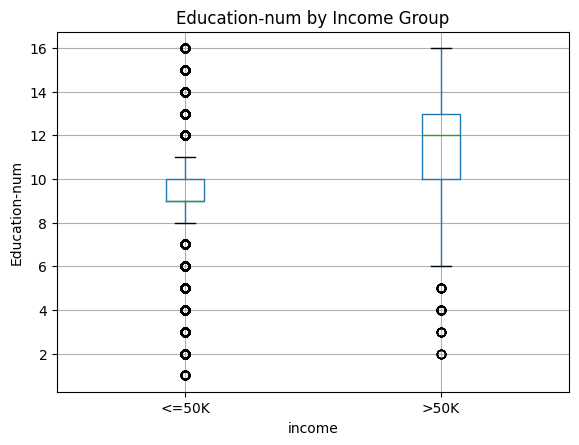

In [46]:
# Education-num comparison
plt.figure(figsize=(8,6))
df.boxplot(column="education-num", by="income")
plt.title("Education-num by Income Group")
plt.suptitle("")
plt.ylabel("Education-num")
plt.show()

In [47]:
df_numeric = pd.get_dummies(df, drop_first=False)


In [48]:
print(df_numeric.head(10))

    age  education-num  hours-per-week  workclass_Private  workclass_Public  \
0  39.0             13              40              False              True   
1  50.0             13              13              False             False   
2  38.0              9              40               True             False   
3  53.0              7              40               True             False   
4  28.0             13              40               True             False   
5  37.0             14              40               True             False   
6  49.0              5              16               True             False   
7  52.0              9              45              False             False   
8  31.0             14              50               True             False   
9  42.0             13              40               True             False   

   workclass_Self-employed  workclass_Without-pay  marital-status_Divorced  \
0                    False                  False   

In [49]:
df_numeric.to_csv("adult_numeric.csv", index=False)
print("Saved new dataset to adult_numeric.csv")

Saved new dataset to adult_numeric.csv


In [50]:
corr_matrix = df_numeric.corr()
print("Correlation matrix shape:", corr_matrix.shape)

Correlation matrix shape: (42, 42)


In [51]:
edu_corr = corr_matrix["education-num"].sort_values(ascending=False)
print("\nCorrelations with education-num (descending):\n", edu_corr)


Correlations with education-num (descending):
 education-num                           1.000000
occupation_Prof-specialty               0.427039
income_>50K                             0.335286
occupation_Exec-managerial              0.201806
workclass_Public                        0.157946
hours-per-week                          0.152522
marital-status_Married                  0.080741
relationship_Husband                    0.073645
race_Asian-Pac-Islander                 0.062022
occupation_Tech-support                 0.058569
relationship_Not-in-family              0.057331
workclass_Self-employed                 0.054259
race_White                              0.052615
age                                     0.043928
relationship_Wife                       0.033640
occupation_Sales                        0.025484
sex_Male                                0.006157
occupation_Protective-serv              0.003946
occupation_Armed-Forces                -0.000069
occupation_Adm-cleric

In [52]:
income_corr = corr_matrix["income_<=50K"].sort_values(ascending=False)
print("\nCorrelations with income_<=50K (descending):\n", income_corr)


Correlations with income_<=50K (descending):
 income_<=50K                            1.000000
marital-status_Never-married            0.320053
relationship_Own-child                  0.226186
sex_Female                              0.216699
relationship_Not-in-family              0.193258
occupation_Other-service                0.165934
relationship_Unmarried                  0.145799
marital-status_Divorced                 0.132030
workclass_Private                       0.117218
occupation_Adm-clerical                 0.099849
occupation_Handlers-cleaners            0.093836
race_Black                              0.088332
relationship_Other-relative             0.084457
occupation_Machine-op-inspct            0.075912
marital-status_Separated                0.074056
marital-status_Widowed                  0.059097
occupation_Farming-fishing              0.056483
marital-status_Married-spouse-absent    0.042562
occupation_Priv-house-serv              0.038618
race_Other            

In [53]:
bins = [0, 30, 55, df["age"].max()]  
labels = ["young", "mid-age", "old"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)

df_age = df[["age", "age_group"]]

In [57]:
print(df_age.head(10))

    age age_group
0  39.0   mid-age
1  50.0   mid-age
2  38.0   mid-age
3  53.0   mid-age
4  28.0     young
5  37.0   mid-age
6  49.0   mid-age
7  52.0   mid-age
8  31.0   mid-age
9  42.0   mid-age


In [58]:
edu_min = df["education-num"].min()
edu_max = df["education-num"].max()

df["education_num_minmax"] = (df["education-num"] - edu_min) / (edu_max - edu_min)

In [59]:

num_cols = ["age", "hours-per-week", "education-num"]

means = df[num_cols].mean()
stds = df[num_cols].std()

df_zscore = (df[num_cols] - means) / stds

df[["age_zscore", "hours_per_week_zscore", "education_num_zscore"]] = df_zscore

In [60]:
hours_compare = pd.DataFrame({
    "hours_original": df["hours-per-week"],
    "hours_minmax": (df["hours-per-week"] - df["hours-per-week"].min()) /
                    (df["hours-per-week"].max() - df["hours-per-week"].min()),
    "hours_zscore": df["hours_per_week_zscore"]
})

In [61]:
print(hours_compare.head(10))

   hours_original  hours_minmax  hours_zscore
0              40      0.397959     -0.077733
1              13      0.122449     -2.331492
2              40      0.397959     -0.077733
3              40      0.397959     -0.077733
4              40      0.397959     -0.077733
5              40      0.397959     -0.077733
6              16      0.153061     -2.081074
7              45      0.448980      0.339630
8              50      0.500000      0.756993
9              40      0.397959     -0.077733
